### Lista 07

#### Aluno: Leodécio Braz
#### Matricula: 377594

In [1]:
from sklearn import datasets 
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn import naive_bayes

from sklearn import neighbors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
kfold = KFold(n_splits=5)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

## Regressão

In [3]:
#X,y = datasets.load_boston(return_X_y=True)
boston = datasets.load_boston(return_X_y=False)
X = boston.data
y = boston.target

In [4]:
def standardize(X):
    X_std = np.copy(X)
    n_cols = X.shape[1]
    for i in range(n_cols):
        X_std[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    return X_std

In [5]:
X_std = standardize(X)

### Gradient Descent

In [6]:
modelSGD = linear_model.SGDRegressor()

In [7]:
RMSE = 0.0
MAE = 0.0

for train_index, test_index in kfold.split(X):
    X_train = X_std[train_index]
    X_test = X_std[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    modelSGD.fit(X_train,y_train)
    y_pred = modelSGD.predict(X_test)
    
    MAE += metrics.mean_absolute_error(y_test,y_pred)
    RMSE += metrics.mean_squared_error(y_test,y_pred)

MAE = MAE/5
RMSE =  np.sqrt(RMSE/5)
print("MAE: " + str(MAE) + " RMSE: " +str(RMSE))

MAE: 4.457730948261966 RMSE: 6.707211196392672


/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


###  Linear Regression

In [8]:
modelLR = linear_model.LinearRegression()

In [9]:
RMSE = 0.0
MAE = 0.0

for train_index, test_index in kfold.split(X):
    X_train = X_std[train_index]
    X_test = X_std[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    modelLR.fit(X_train,y_train)
    y_pred = modelLR.predict(X_test)
    
    MAE += metrics.mean_absolute_error(y_test,y_pred)
    RMSE += metrics.mean_squared_error(y_test,y_pred)

MAE = MAE/5
RMSE =  np.sqrt(RMSE/5)
print("MAE: " + str(MAE) + " RMSE: " +str(RMSE))

MAE: 4.2565740468038875 RMSE: 6.101052666314072


### KNN

In [10]:
modelKNN = neighbors.KNeighborsRegressor()

In [11]:
RMSE_ = 0.0
MAE_ = 0.0

for train_index, test_index in kfold.split(X):
    X_train = X_std[train_index]
    X_test = X_std[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    modelKNN.fit(X_train,y_train)
    y_pred = modelKNN.predict(X_test)
    
    MAE_ += metrics.mean_absolute_error(y_test,y_pred)
    RMSE_ += metrics.mean_squared_error(y_test,y_pred)

MAE = MAE_/5
RMSE =  np.sqrt(RMSE_/5)
print("MAE: " + str(MAE) + " RMSE: " +str(RMSE))

MAE: 3.7022620850320322 RMSE: 5.438388165234258


### SVM

In [12]:
modelSVM = svm.SVR()

In [13]:
RMSE_ = 0.0
MAE_ = 0.0

for train_index, test_index in kfold.split(X):
    X_train = X_std[train_index]
    X_test = X_std[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    modelSVM.fit(X_train,y_train)
    y_pred = modelSVM.predict(X_test)
    
    MAE_ += metrics.mean_absolute_error(y_test,y_pred)
    RMSE_ += metrics.mean_squared_error(y_test,y_pred)

MAE = MAE_/5
RMSE =  np.sqrt(RMSE_/5)
print("MAE: " + str(MAE) + " RMSE: " +str(RMSE))

MAE: 4.223314829625372 RMSE: 6.588904420950123


### Moldelo Final

In [14]:
model = neighbors.KNeighborsRegressor()

In [15]:
#XX = StandardScaler().fit_transform(X)

model.fit(X_std,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [16]:
y_pred = model.predict(X_std)

In [17]:
MAE = metrics.mean_absolute_error(y,y_pred)
MSE = metrics.mean_squared_error(y,y_pred)
RMSE = np.sqrt(MSE)
print("MAE: " + str(MAE) + " RMSE: " +str(RMSE))

MAE: 2.13 RMSE: 3.3672833022994464


## Classificação

In [18]:
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target

In [19]:
def normalize(X):
    y = np.copy(X)
    for i in range(X.shape[1]):
        y[:,i] = ((X[:,i] - np.min(X[:,i]))/(np.max(X[:,i]) - np.min(X[:,i])))
    return y

In [20]:
X_norm = normalize(X)

In [21]:
X_df = pd.DataFrame(X_norm)

In [22]:
def printRocCurve(y_test,y_score):
    for i in range (0,len(y_test)):
        metrics.roc_auc_score(y_test[i], y_score[i])
        fpr, tpr, _ = metrics.roc_curve(y_test[i], y_score[i])
        roc_auc = metrics.auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    

### Logistic Regression

In [23]:
modelLRG = linear_model.LogisticRegression()

1: [[58 10]
 [ 1 45]]
2: [[41  8]
 [ 0 65]]
3: [[36  4]
 [ 0 74]]
4: [[28  1]
 [ 1 84]]
5: [[26  0]
 [ 1 86]]
accuracy: 0.9543704393727681
precision: 0.9291092039843047
recall: 0.9910003821618603
F1-Measure: 0.9578514504482583
AUC: 0.951019502253675


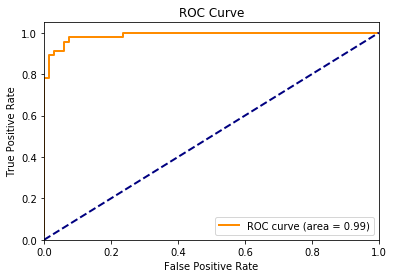

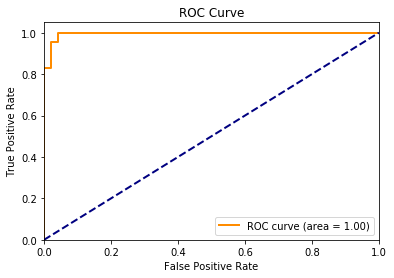

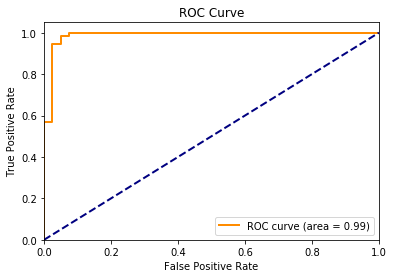

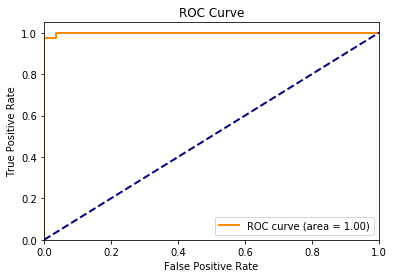

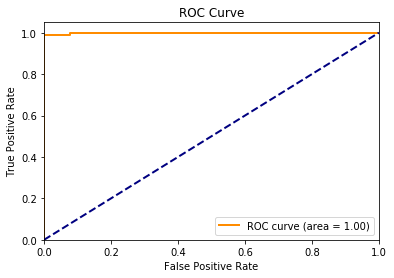

In [24]:
accuracy = 0.0
precision = 0.0
recall = 0.0
f1Measure = 0.0
auc = 0.0
y_testes = []
y_probas = []
i = 1
for train_index, test_index in kfold.split(X):
    X_train = X_norm[train_index]
    X_test = X_norm[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    y_testes.append(y_test)
    
    modelLRG.fit(X_train,y_train)
    y_pred = modelLRG.predict(X_test)
    
    conf_matriz = metrics.confusion_matrix(y_test,y_pred)
    
    y_score = modelLRG.predict_proba(X_test)[:,1]
    y_probas.append(y_score)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1Measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    print(str(i) +': ' + str(conf_matriz))
    i=i+1
    

accuracy = accuracy/5
precision = precision/5
recall = recall/5
f1Measure = f1Measure/5
auc = auc/5
print("accuracy: " + str(accuracy) + "\nprecision: " +str(precision)+ "\nrecall: " +str(recall)
     + "\nF1-Measure: " +str(f1Measure) + "\nAUC: " +str(auc))

printRocCurve(y_testes,y_probas)

### KNN

In [25]:
modelKNN = neighbors.KNeighborsClassifier()

1: [[61  7]
 [ 2 44]]
2: [[46  3]
 [ 0 65]]
3: [[36  4]
 [ 0 74]]
4: [[27  2]
 [ 0 85]]
5: [[26  0]
 [ 3 84]]
accuracy: 0.9631113181183046
precision: 0.9488713787902429
recall: 0.9844077961019491
F1-Measure: 0.9658345095536731
AUC: 0.9588907797001859


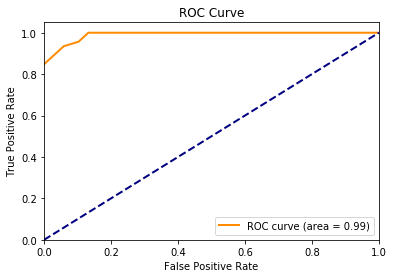

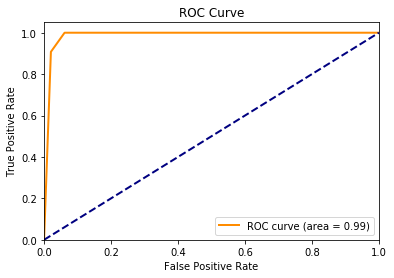

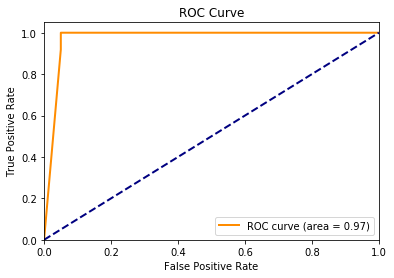

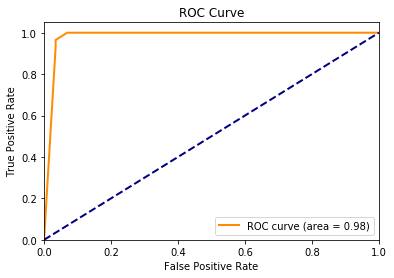

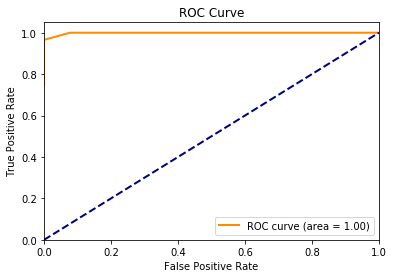

In [26]:
accuracy = 0.0
precision = 0.0
recall = 0.0
f1Measure = 0.0
auc = 0.0
y_testes = []
y_probas = []
i = 1
for train_index, test_index in kfold.split(X):
    X_train = X_norm[train_index]
    X_test = X_norm[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    y_testes.append(y_test)
    
    modelKNN.fit(X_train,y_train)
    y_pred = modelKNN.predict(X_test)
    
    conf_matriz = metrics.confusion_matrix(y_test,y_pred)
    
    y_score = modelKNN.predict_proba(X_test)[:,1]
    y_probas.append(y_score)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1Measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    print(str(i) +': ' + str(conf_matriz))
    i=i+1
    

accuracy = accuracy/5
precision = precision/5
recall = recall/5
f1Measure = f1Measure/5
auc = auc/5
print("accuracy: " + str(accuracy) + "\nprecision: " +str(precision)+ "\nrecall: " +str(recall)
     + "\nF1-Measure: " +str(f1Measure) + "\nAUC: " +str(auc))

printRocCurve(y_testes,y_probas)

### Naive Bayes

In [27]:
modelNVB = naive_bayes.GaussianNB()

1: [[58 10]
 [ 4 42]]
2: [[43  6]
 [ 2 63]]
3: [[37  3]
 [ 3 71]]
4: [[27  2]
 [ 1 84]]
5: [[24  2]
 [ 7 80]]
accuracy: 0.9296848315478963
precision: 0.9265098375113417
recall: 0.9499018461907605
F1-Measure: 0.9372205053092115
AUC: 0.9259112833668098


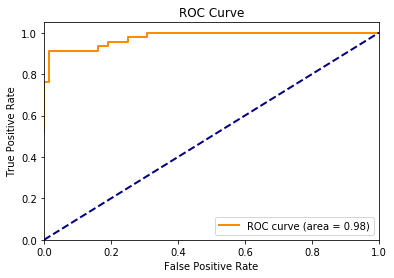

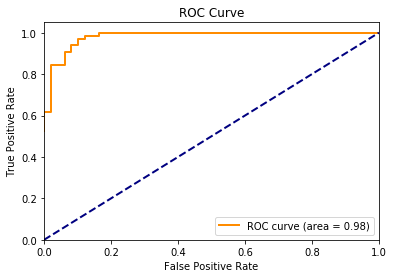

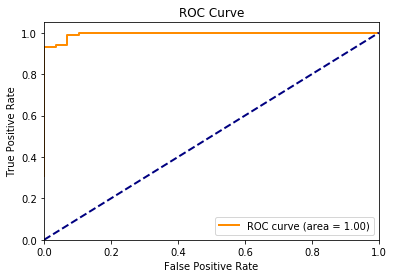

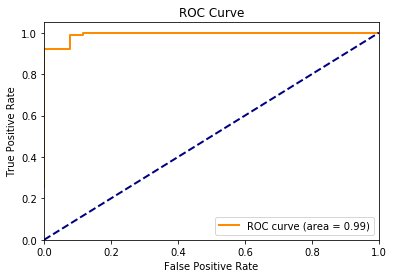

In [28]:
accuracy = 0.0
precision = 0.0
recall = 0.0
f1Measure = 0.0
auc = 0.0
y_testes = []
y_probas = []
i = 1
for train_index, test_index in kfold.split(X):
    X_train = X_norm[train_index]
    X_test = X_norm[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    y_testes.append(y_test)
    
    modelNVB.fit(X_train,y_train)
    y_pred = modelNVB.predict(X_test)
    
    conf_matriz = metrics.confusion_matrix(y_test,y_pred)
    
    y_score = modelNVB.predict_proba(X_test)[:,1]
    y_probas.append(y_score)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1Measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    print(str(i) +': ' + str(conf_matriz))
    i=i+1
    

accuracy = accuracy/5
precision = precision/5
recall = recall/5
f1Measure = f1Measure/5
auc = auc/5
print("accuracy: " + str(accuracy) + "\nprecision: " +str(precision)+ "\nrecall: " +str(recall)
     + "\nF1-Measure: " +str(f1Measure) + "\nAUC: " +str(auc))

printRocCurve(y_testes,y_probas)

### SVM

In [29]:
modelSVM = svm.SVC(probability=True)

1: [[52 16]
 [ 0 46]]
2: [[40  9]
 [ 0 65]]
3: [[36  4]
 [ 0 74]]
4: [[27  2]
 [ 0 85]]
5: [[24  2]
 [ 1 86]]
accuracy: 0.9403043005744449
precision: 0.9046632064985791
recall: 0.9977011494252874
F1-Measure: 0.9464034193639435
AUC: 0.9323649565927168


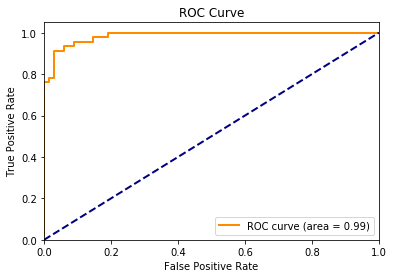

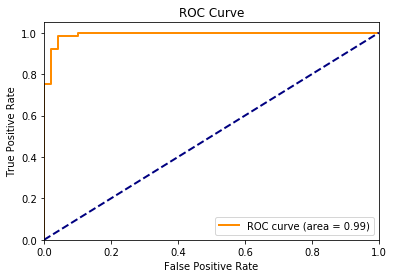

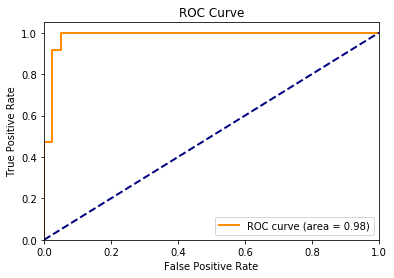

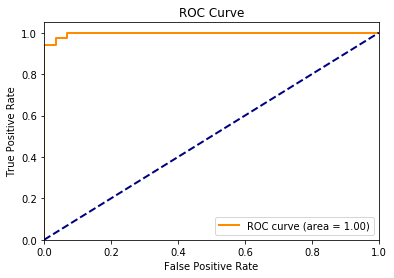

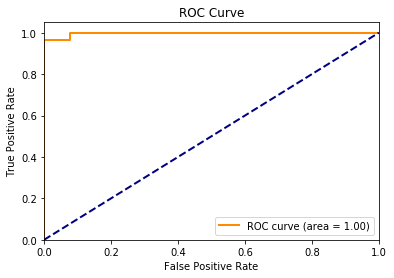

In [30]:
accuracy = 0.0
precision = 0.0
recall = 0.0
f1Measure = 0.0
auc = 0.0
y_testes = []
y_probas = []
i = 1
for train_index, test_index in kfold.split(X):
    X_train = X_norm[train_index]
    X_test = X_norm[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    y_testes.append(y_test)
    
    modelSVM.fit(X_train,y_train)
    y_pred = modelSVM.predict(X_test)
    
    conf_matriz = metrics.confusion_matrix(y_test,y_pred)
    
    y_score = modelSVM.predict_proba(X_test)[:,1]
    y_probas.append(y_score)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1Measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    print(str(i) +': ' + str(conf_matriz))
    i=i+1
    

accuracy = accuracy/5
precision = precision/5
recall = recall/5
f1Measure = f1Measure/5
auc = auc/5
print("accuracy: " + str(accuracy) + "\nprecision: " +str(precision)+ "\nrecall: " +str(recall)
     + "\nF1-Measure: " +str(f1Measure) + "\nAUC: " +str(auc))

printRocCurve(y_testes,y_probas)

### Modelo Final

In [31]:
modelKNN = neighbors.KNeighborsClassifier()

In [32]:
modelKNN.fit(X_norm,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_pred = modelKNN.predict(X_norm)

In [34]:
print(metrics.accuracy_score(y,y_pred))

0.9789103690685413
